# SVM Test Cases Without Kernel Trick

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from ctypes import *

%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulateSharedMethods.py"
%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulateSVM.py"
pathDLL = "C:/Users/nico_/Documents/GitHub/ProjetAnnuel3IBD/projet/MLAlgorithms/ML_Library/x64/Release/ML_Library.dll"
myDll = CDLL(pathDLL)

## Classification
- <font color=green>Mathematica example</font>

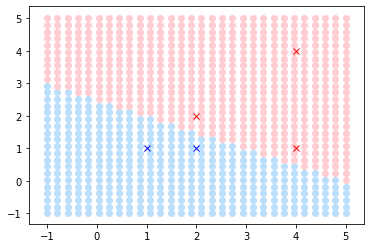

In [2]:
Y = [ 1, 1, -1, -1, -1]
Xnp = np.array([ [1, 1], [2, 1], [2, 2], [4, 1], [4, 4]], dtype=float)
X = Xnp.flatten().tolist()
Ynp = np.array(Y, dtype=float)

bigMatrix = getBigMatrix(Xnp, Ynp)
alpha = getAlpha(bigMatrix, Ynp)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 0)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Get Alphas as eigen::vector
alphaVector = datasetToVector(myDll,alpha, 0)


WVector = fitSvm(myDll, pMatrixX, pMatrixY, alphaVector)

X1 = np.linspace(-1, 5, 30)
X2 = np.linspace(-1, 5, 30)

# Predict points to test if Model is working 
displaySVMClassifResult2D(myDll, WVector, X1, X2)
plot_dataset(Xnp, Ynp)

- <font color=green>Linear Simple</font>

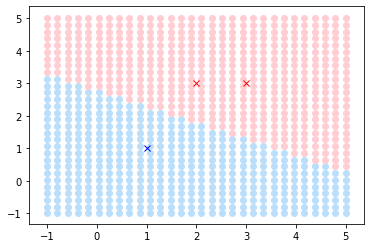

<Figure size 432x288 with 0 Axes>

In [3]:
# Points Data
Xnp = np.array([ [1, 1], [2, 3], [3, 3] ], dtype=float)
Ynp = np.array([ 1, -1, -1 ],dtype=float)
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

bigMatrix = getBigMatrix(Xnp, Ynp)
alpha = getAlpha(bigMatrix, Ynp)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 0)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Get Alphas as eigen::vector
alphaVector = datasetToVector(myDll,alpha, 0)


WVector = fitSvm(myDll, pMatrixX, pMatrixY, alphaVector)

X1 = np.linspace(-1, 5, 30)
X2 = np.linspace(-1, 5, 30)

# Predict points to test if Model is working 
displaySVMClassifResult2D(myDll, WVector, X1, X2)

# Display data points
plot_dataset(Xnp, Ynp)
plt.show()
plt.clf()

- <font color=green>Linear Multiple</font>

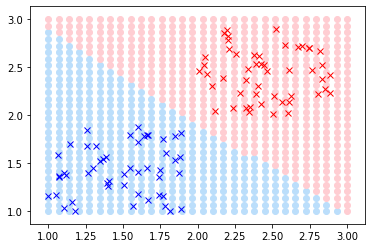

<Figure size 432x288 with 0 Axes>

In [4]:
# Points Data
Xnp = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Ynp = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])
Ynp = Ynp.flatten()

X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

bigMatrix = getBigMatrix(Xnp, Ynp)
alpha = getAlpha(bigMatrix, Ynp)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 0)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Get Alphas as eigen::vector
alphaVector = datasetToVector(myDll,alpha, 0)


WVector = fitSvm(myDll, pMatrixX, pMatrixY, alphaVector)

X1 = np.linspace(1, 3, 30)
X2 = np.linspace(1, 3, 30)

# Predict points to test if Model is working 
displaySVMClassifResult2D(myDll, WVector, X1, X2)

# Display data points
plot_dataset(Xnp, Ynp)
plt.show()
plt.clf()

- <font color=green>Linear Multiple Triple Class</font>

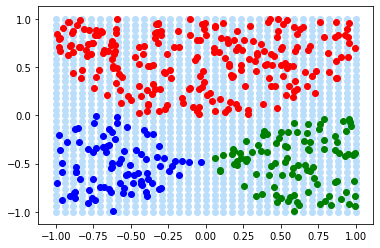

<Figure size 432x288 with 0 Axes>

In [5]:
# Points Data
Xnp = np.random.random((500, 2)) * 2.0 - 1.0
Ynp = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else #A
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else #B
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else #C
              [0, 0, 0] for p in Xnp])

X = matrixToArray(Xnp.tolist())
Y = matrixToArray(Ynp.tolist())

pMatrixX = loadTestCase(myDll, X, Xnp.shape[0],  Xnp.shape[1], 0)

# //////// Train A
Y1 = [ 1 if y == [1, 0, 0] else -1 for y in Ynp.tolist()]
Y1 = np.array(Y1, dtype=float)
pMatrixY1 = loadTestCase(myDll, Y1, Y1.shape[0], 1, 0)
bigMatrix1 = getBigMatrix(Xnp, Y1)
alpha1 = getAlpha(bigMatrix1, Y1)

# Get Alphas as eigen::vector
alphaVector1 = datasetToVector(myDll,alpha1, 0)
WVector1 = fitSvm(myDll, pMatrixX, pMatrixY1, alphaVector1)

#//////// Train B
Y2 = [ 1 if y == [0, 1, 0] else -1 for y in Ynp.tolist()]
Y2 = np.array(Y2,dtype=float)
pMatrixY2 = loadTestCase(myDll, Y2, Y2.shape[0], 1, 0)
bigMatrix2 = getBigMatrix(Xnp, Y2)
alpha2 = getAlpha(bigMatrix2, Y2)

# Get Alphas as eigen::vector
alphaVector2 = datasetToVector(myDll,alpha2, 0)
WVector2 = fitSvm(myDll, pMatrixX, pMatrixY2, alphaVector2)

# ////////Train C
Y3 = [ 1 if y == [0, 0, 1] else -1 for y in Ynp.tolist()]
Y3 = np.array(Y3, dtype=float)

pMatrixY3 = loadTestCase(myDll, Y3, Y3.shape[0], 1, 0)
bigMatrix3 = getBigMatrix(Xnp, Y3)
alpha3 = getAlpha(bigMatrix3, Y3)

# Get Alphas as eigen::vector
alphaVector3 = datasetToVector(myDll,alpha3, 0)
WVector3 = fitSvm(myDll, pMatrixX, pMatrixY3, alphaVector3)

X1 = np.linspace(-1, 1, 35)
X2 = np.linspace(-1, 1, 35)

displaySVMClassifResult2DTripleClass(myDll, WVector1, WVector2, WVector3, X1, X2)

# Display data points
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,1], color='green')
plt.show()
plt.clf()

# SVM Test Cases With Kernel Trick ( Radial Kernel)
- <font color=green>Mathematica example</font>

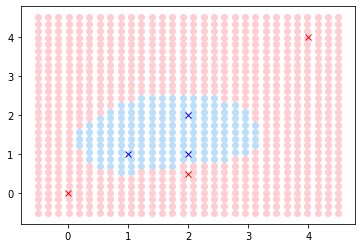

In [10]:
Y = [ 1,1, 1, -1, -1, -1]
Xnp = np.array([ [1, 1], [2, 1], [2, 2], [2, 0.5], [4, 4], [0, 0]], dtype=float)
X = Xnp.flatten().tolist()
Ynp = np.array(Y, dtype=float)

bigMatrix = getBigMatrixKernelTrick(Xnp, Ynp)

alpha = getAlpha(bigMatrix, Ynp)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 0)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Get Alphas as eigen::vector
alphaVector = datasetToVector(myDll,alpha, 0)

W0 = fitSvmKernelTrick(myDll, pMatrixX, pMatrixY, alphaVector)

X1 = np.linspace(-0.5, 4.5, 30)
X2 = np.linspace(-0.5, 4.5, 30)

displaySVMKerneltrickClassifResult2D(myDll, W0,pMatrixX, pMatrixY, alphaVector, X1, X2)

plot_dataset(Xnp, Ynp)





- <font color=green>Xor</font>

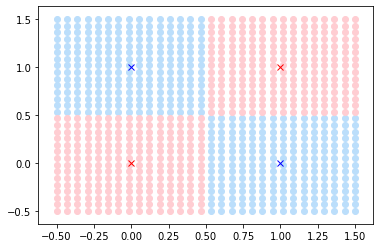

In [13]:
# Points Data
Xnp = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype=float)
Ynp = np.array([1, 1, -1, -1], dtype=float)

X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

bigMatrix = getBigMatrixKernelTrick(Xnp, Ynp)
alpha = getAlpha(bigMatrix, Ynp)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 0)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Get Alphas as eigen::vector
alphaVector = datasetToVector(myDll,alpha, 0)

X1 = np.linspace(-0.5, 1.5, 30)
X2 = np.linspace(-0.5, 1.5, 30)


W0 = fitSvmKernelTrick(myDll, pMatrixX, pMatrixY, alphaVector)

displaySVMKerneltrickClassifResult2D(myDll, W0,pMatrixX, pMatrixY, alphaVector, X1, X2)

plot_dataset(Xnp, Ynp)


- <font color=green>Cross</font>

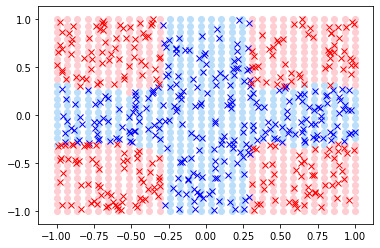

In [14]:
# Points Data
Xnp = np.random.random((500, 2)) * 2.0 - 1.0
Ynp = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in Xnp], dtype=float)
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

bigMatrix = getBigMatrixKernelTrick(Xnp, Ynp)
alpha = getAlpha(bigMatrix, Ynp)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 0)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Get Alphas as eigen::vector
alphaVector = datasetToVector(myDll,alpha, 0)

X1 = np.linspace(-1, 1, 30)
X2 = np.linspace(-1, 1, 30)

W0 = fitSvmKernelTrick(myDll, pMatrixX, pMatrixY, alphaVector)

displaySVMKerneltrickClassifResult2D(myDll, W0,pMatrixX, pMatrixY, alphaVector, X1, X2)

plot_dataset(Xnp, Ynp)

- <font color=red>Multi Cross</font>

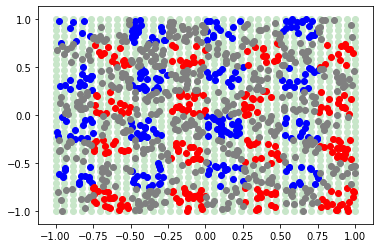

<Figure size 432x288 with 0 Axes>

In [7]:
# Points Data
Xnp = np.random.random((1000, 2)) * 2.0 - 1.0
Ynp = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else 
              [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else 
              [0, 0, 1] for p in Xnp])
X = matrixToArray(Xnp.tolist())
Y = matrixToArray(Ynp.tolist())

pMatrixX = loadTestCase(myDll, X, Xnp.shape[0],  Xnp.shape[1], 0)

# //////// Train A
Y1 = [ 1 if y == [1, 0, 0] else -1 for y in Ynp.tolist()]
Y1 = np.array(Y1, dtype=float)
pMatrixY1 = loadTestCase(myDll, Y1, Y1.shape[0], 1, 0)
bigMatrix1 = getBigMatrix(Xnp, Y1)
alpha1 = getAlpha(bigMatrix1, Y1)

# Get Alphas as eigen::vector
alphaVector1 = datasetToVector(myDll,alpha1, 0)
WVector1 = fitSvm(myDll, pMatrixX, pMatrixY1, alphaVector1)

#//////// Train B
Y2 = [ 1 if y == [0, 1, 0] else -1 for y in Ynp.tolist()]
Y2 = np.array(Y2,dtype=float)
pMatrixY2 = loadTestCase(myDll, Y2, Y2.shape[0], 1, 0)
bigMatrix2 = getBigMatrix(Xnp, Y2)
alpha2 = getAlpha(bigMatrix2, Y2)

# Get Alphas as eigen::vector
alphaVector2 = datasetToVector(myDll,alpha2, 0)
WVector2 = fitSvm(myDll, pMatrixX, pMatrixY2, alphaVector2)

# ////////Train C
Y3 = [ 1 if y == [0, 0, 1] else -1 for y in Ynp.tolist()]
Y3 = np.array(Y3, dtype=float)
pMatrixY3 = loadTestCase(myDll, Y3, Y3.shape[0], 1, 0)
bigMatrix3 = getBigMatrix(Xnp, Y3)
alpha3 = getAlpha(bigMatrix3, Y3)

# Get Alphas as eigen::vector
alphaVector3 = datasetToVector(myDll,alpha3, 0)
WVector3 = fitSvm(myDll, pMatrixX, pMatrixY3, alphaVector3)

X1 = np.linspace(-1, 1, 35)
X2 = np.linspace(-1, 1, 35)

displaySVMClassifResult2DTripleClass(myDll, WVector1, WVector2, WVector3, X1, X2)

# Display data points
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,1], color='grey')
plt.show()
plt.clf()

## Regression
- <font color=green>Linear Simple 2D</font>

In [9]:
# Points Data
X = [ 1, 2 ]
Y = [ 2, 3 ]
Xnp = np.array([ [1], [2] ], dtype=float)
Ynp = np.array([ 2, 3],  dtype=float)

bigMatrix = getBigMatrix(Xnp, Ynp)
alpha = getAlpha(bigMatrix, Ynp)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 0)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Get Alphas as eigen::vector
alphaVector = datasetToVector(myDll,alpha, 0)

WVector = fitSvm(myDll, pMatrixX, pMatrixY, alphaVector)

X1 = np.linspace(0, 4, 40)

displaySVMRegResult2D(myDll, WVector, X1)

# Display data points
plot_dataset(Xnp, Ynp)
plt.show()
plt.clf()

OSError: exception: access violation reading 0x0000000000000008